In [3]:
#Import the librariesOops, something went wrong ...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Moulali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [6]:
# loading the dataset to a pandas DataFrame
df = pd.read_csv(r"C:\Users\Moulali\Downloads\fake-news\train.csv")

In [7]:
df.shape

(20800, 5)

In [8]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [9]:
# counting the number of missing values in the dataset
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [10]:
# replacing the null values with empty string
df = df.fillna('')

In [11]:
# merging the author name and news title
df['content'] = df['author']+' '+df['title']

In [12]:
print(df['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [13]:
# separating the data & label
X = df.drop(columns='label', axis=1)
Y = df['label']
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [14]:
port_stem = PorterStemmer()

In [15]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [16]:
df['content'] = df['content'].apply(stemming)

In [17]:
print(df['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [18]:
#separating the data and label
X = df['content'].values
Y = df['label'].values

In [19]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [20]:
print(Y)
Y.shape

[1 0 1 ... 0 1 1]


(20800,)

In [21]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

In [22]:
#splitting the data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

#**logistic Regression 

In [23]:
model = LogisticRegression()

In [24]:
model.fit(X_train, Y_train)

LogisticRegression()

In [25]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9865985576923076


In [26]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9790865384615385


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
Y_pred = model.predict(X_test)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
auc_roc = roc_auc_score(Y_test, Y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)

Precision: 0.9659197012138189
Recall: 0.9932789246279404
F1-score: 0.9794082840236686
AUC-ROC: 0.9790660391074223


#**Predicting whether it is real or fake

In [28]:
X_new = X_test[8]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


In [29]:
print(Y_test[8])

1


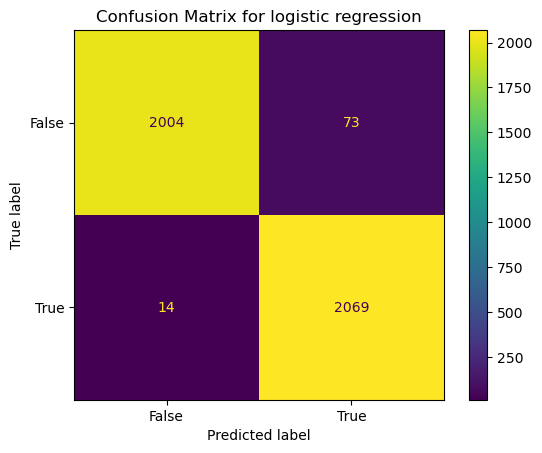

In [31]:
#Confusion matrix for logistic regression
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, model.predict(X_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False, True])

cm_display.plot()
plt.title('Confusion Matrix for logistic regression')
plt.show()

#**Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

# testing the model
print(accuracy_score(Y_train, model.predict(X_train)))
print(accuracy_score(Y_test, model.predict(X_test)))

precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

# Print or analyze the evaluation results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

1.0
0.9935096153846154
Precision: 0.9942307692307693
Recall: 0.9927988478156505
F1-score: 0.9935142925774681


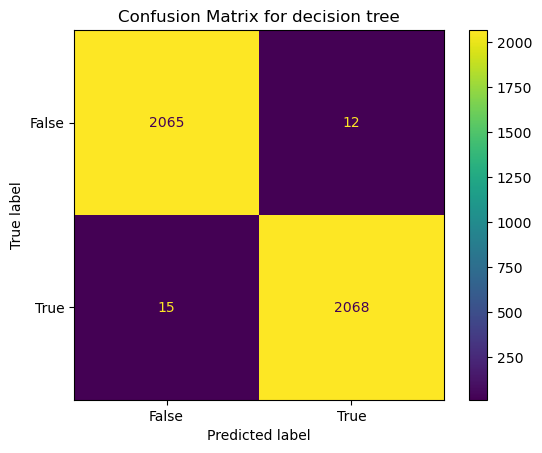

In [33]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, model.predict(X_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False, True])

cm_display.plot()
plt.title('Confusion Matrix for decision tree')
plt.show()


#**Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
# Create an instance of the Random Forest classifier
rf = RandomForestClassifier()

# Fit the model to the training data
rf.fit(X_train, Y_train)

# 4. Model Evaluation
# Use the trained model to predict labels for the testing data
y_pred = rf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
auc_roc = roc_auc_score(Y_test, y_pred)

# Print or analyze the evaluation results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)

Accuracy: 0.9930288461538461
Precision: 0.9904489016236867
Recall: 0.9956793086893903
F1-score: 0.9930572180991141
AUC-ROC: 0.9930250178497505


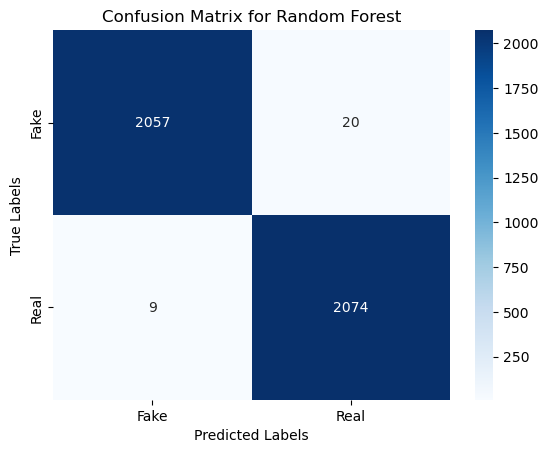

In [35]:
from sklearn.metrics import confusion_matrix
# Confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
labels = ['Fake', 'Real']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest')
plt.show()

#**Support Vector Machine

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Support Vector Machines model training
svm = SVC()
svm.fit(X_train, Y_train)

# Prediction
y_pred = svm.predict(X_test)

# Evaluation
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

# Print or analyze the evaluation results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9889423076923077
Precision: 0.9838479809976247
Recall: 0.9942390782525204
F1-score: 0.9890162368672397


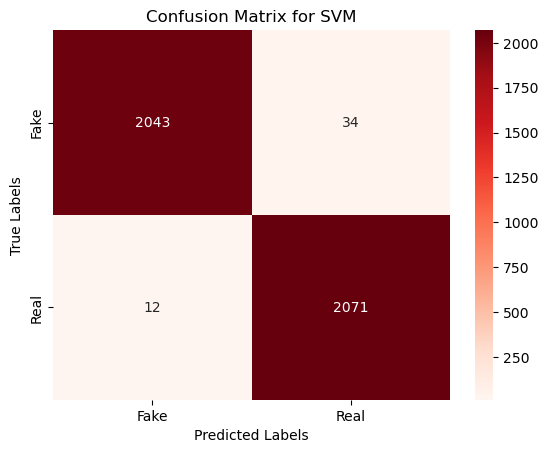

In [37]:
from sklearn.metrics import confusion_matrix
# Confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
labels = ['Fake', 'Real']
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM')
plt.show()

#**Naive bayes

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Training the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, Y_train)

# Making predictions on the test set
y_pred = nb_model.predict(X_test)

# Evaluating the performance of the model
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

print("Naive Bayes Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Naive Bayes Results:
Accuracy: 0.9550480769230769
Precision: 0.9932362122788762
Recall: 0.9164666346615459
F1 Score: 0.9533083645443196


In [39]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2064   13]
 [ 174 1909]]


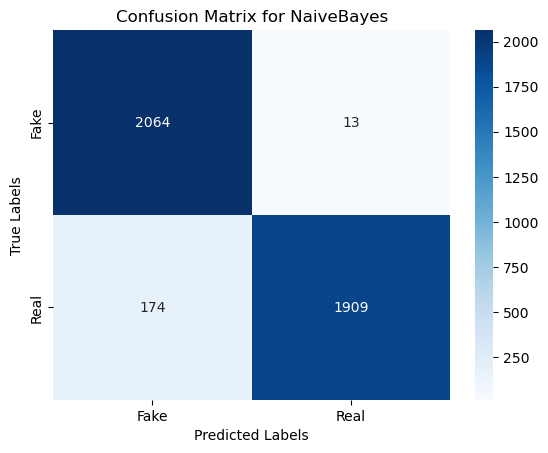

In [40]:
# Confusion matrix for naive bayes
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
labels = ['Fake', 'Real']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for NaiveBayes')
plt.show()

#**K-Nearest Neighbors (KNN)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Training the KNN model
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train, Y_train)

# Making predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluating the performance of the model
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

print("K-Nearest Neighbors (KNN) Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

K-Nearest Neighbors (KNN) Results:
Accuracy: 0.5870192307692308
Precision: 0.5480136806103657
Recall: 1.0
F1 Score: 0.7080217539089055


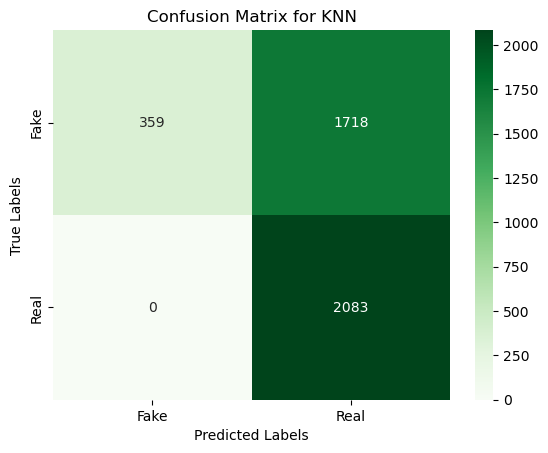

In [45]:
# Confusion matrix for naive bayes
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
labels = ['Fake', 'Real']
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for KNN')
plt.show()